<a href="https://colab.research.google.com/github/nounou-mimi/SIC_exercises/blob/main/pca_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Dimensional reduction with PCA:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

in the following , we will see an application of PCA on image processing. 

In [ ]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [ ]:
df.shape

(23, 23)

In [ ]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


#### 1.2. Visualize the data:

In [ ]:
# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

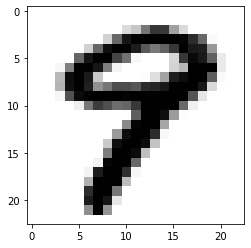

In [ ]:
X = np.array(df)
ShowMe(X)

#### 1.3. Visualize the reduced dimensional input by PCA:

complete the following function , use ``PCA`` from sklearn :
- first transform the given X by setting the number of components ``n_components`` to nPC 
- then transform X using ``fit_transform`` 
- then return the inverse transform of value returned by the latter. (compressed version of X )

In [ ]:
# Define a function that returns reduced dimensional input.
def reducedInputPCA(X,nPC):
    # Define a PCA object for a given number of target PCs. 
    # Get the transformed scores.
    # Bring back the transformed scores to the original coordinate system. Use : pca.inverse_transform(X_pca)
    return res

N# of PCs = 23


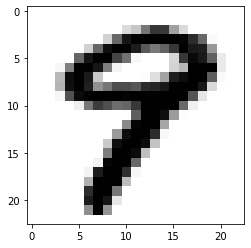

N# of PCs = 10


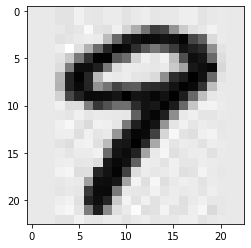

N# of PCs = 5


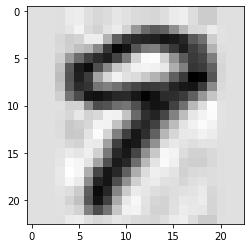

N# of PCs = 3


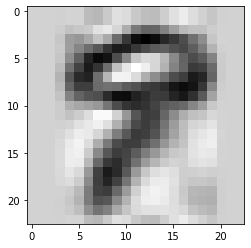

N# of PCs = 1


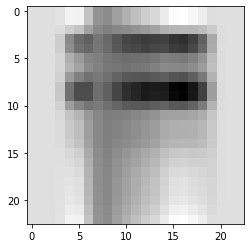

In [ ]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

#### 1.4. Analysis of the cumulative variance ratio (CVR):

In [ ]:
pca = PCA(n_components = 23)                          # Define a PCA object.
pca.fit(X)                                            # Train with the data.

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## visualization of the CVRs

calcuate the cumulative sum using `np.cumsum` of the variance_ratio , you can get it using pca.explained_variance_ratio_



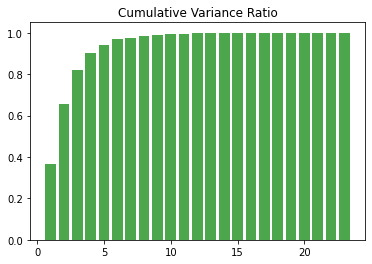

In [ ]:
# Visualize the CVRs as a Barplot.
CVRs =      # Calculate the CVRs.
nPCs = np.arange(23)+1                                 # Define an array that corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()

### 2. Dimensional reduction with NMF:

NMF (Non-negative Matrix Factorization) is applicable for data matrix that contains only non-negative values.<br>
Similar to PCA, we can do dimensional reduction and obtain reduced dimensional input using NMF. <br>
We notice that we get a bit less 'noisy' images compared to the result of PCA.<br>
More information at [Wikipedia](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization).

#### 2.1. Visualize the reduced dimensional input by NMF:

In [ ]:
# Define a function that returns reduced dimensional input.
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0)      # Define a NMF object for a given number of target components.
    X_nmf = nmf.fit_transform(X)                                  # Get the transformed scores.        
    return nmf.inverse_transform(X_nmf)                           # Bring back the transformed scores to the original coordinate system.

N# of Components = 23


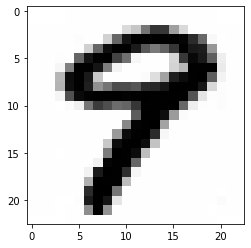

N# of Components = 10


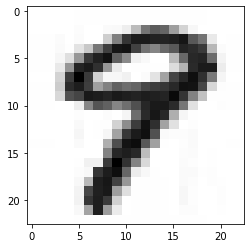

N# of Components = 5


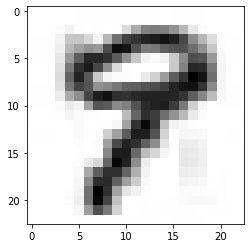

N# of Components = 3


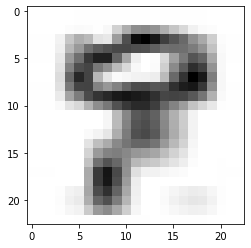

N# of Components = 1


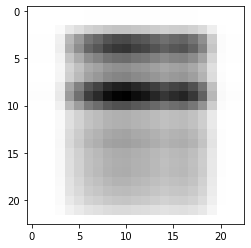

In [ ]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)

### 3. Optimized high dimensional visualiztion with PCA:

#### 3.1. Simulate data:

In [ ]:
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5, random_state=123)
X.shape

(150, 8)

In [ ]:
# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])

plot a scatterplot of X1 and X2 , add hue using labelColors

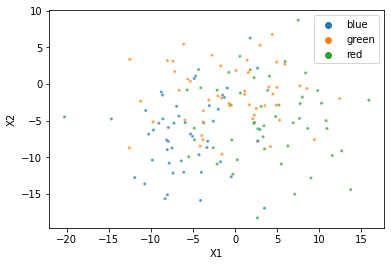

In [ ]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0,  X2 ==> column 1.  
# We can hardly tell the clusters apart! 
# The clusters largely overlap.
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

same as the above but with  X1 and X5 , add hue using labelColors

In [ ]:
# Visualize on the X1 vs X5 plane. X1 ==> column 0,  X5 ==> column 4.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

same as the above but with  X5 and X8 , add hue using labelColors

In [ ]:
# Visualize on the X5 vs X8 plane. X5 ==> column 4,  X8 ==> column 7.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

#### 3.2. Visualize on the plane defined by PC1 and PC2:

let's apply dimentionality reduction on X  , use only two principal components 

In [ ]:
# Only 2 first PCs are needed. 


plot PC1 and PC2 , use the same labelcolors as hue , what do you notice ? 

In [ ]:
# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Set the numbers of PCA to be equel to 3,5 then 6 and use : Linear Regression, Decision Tree, SVM for classification to check the accuracy of your model. 

In [ ]:
#Your code goes here
